执行以下探索性时间序列分析，使用巧克力或啤酒生产数据。  
a) 绘制数据的时间序列图。绘制聚合的年度系列和一个综合了每个季节观察值的箱线图，并评论这些图。  
b) 将系列分解为趋势、季节效应和残差，并绘制分解后的系列。绘制包含超级季节效应的趋势图。

In [164]:
import pandas as pd
import numpy as np

df = pd.read_csv("季节周期数据.csv")

In [165]:
df

,日期,数据
0,1958/1/1,1451\t96.3\t1497
1,1958/2/1,2037\t84.4\t1463
2,1958/3/1,2477\t91.2\t1648
3,1958/4/1,2785\t81.9\t1595
4,1958/5/1,2994\t80.5\t1777
...,...,...
391,1990/8/1,8715\t148.3\t14338
392,1990/9/1,8450\t133.5\t12867
393,1990/10/1,9085\t193.8\t12761
394,1990/11/1,8350\t208.4\t12449


In [166]:
import datetime as dt

tt = []
for i in df["日期"]:
    a = dt.datetime.strptime(i,'%Y/%m/%d')
    b = dt.datetime.strftime(a,'%Y-%m-%d')
    tt.append(b)
df['date'] = tt

In [167]:
df['数据2.0'] = df['数据'].str.replace('\t', '')

In [168]:
pd.set_option('display.float_format', '{:.2f}'.format)

# 执行数据类型转换
df["数据3.0"] = df['数据2.0'].astype(float)



In [169]:
df

,日期,数据,date,数据2.0,数据3.0
0,1958/1/1,1451\t96.3\t1497,1958-01-01,145196.31497,145196.31
1,1958/2/1,2037\t84.4\t1463,1958-02-01,203784.41463,203784.41
2,1958/3/1,2477\t91.2\t1648,1958-03-01,247791.21648,247791.22
3,1958/4/1,2785\t81.9\t1595,1958-04-01,278581.91595,278581.92
4,1958/5/1,2994\t80.5\t1777,1958-05-01,299480.51777,299480.52
...,...,...,...,...,...
391,1990/8/1,8715\t148.3\t14338,1990-08-01,8715148.314338,8715148.31
392,1990/9/1,8450\t133.5\t12867,1990-09-01,8450133.512867,8450133.51
393,1990/10/1,9085\t193.8\t12761,1990-10-01,9085193.812761,9085193.81
394,1990/11/1,8350\t208.4\t12449,1990-11-01,8350208.412449,8350208.41


In [170]:
df['date'] = pd.to_datetime(df['date'])  # 将日期列转换为Datetime类型
df.set_index('date', inplace=True)

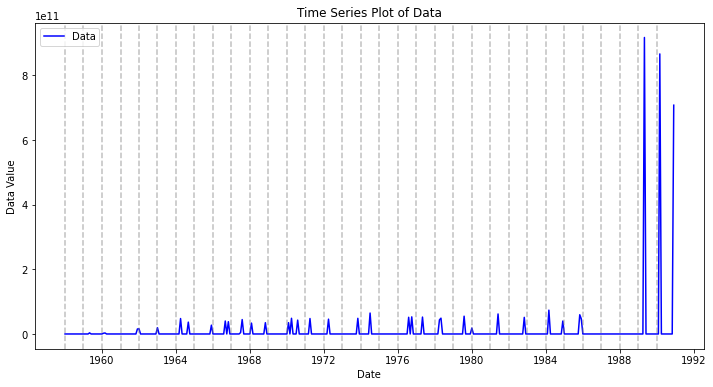

In [172]:
# 1. 画出数据的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['数据3.0'], linestyle='-', label='Data', color='b')
plt.title('Time Series Plot of Data')
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.legend()

# 添加横轴标签（仅显示每年的第一天）
for year in df.index.year.unique():
    first_day_of_year = df[df.index.year == year].index[0]
    plt.axvline(x=first_day_of_year, color='gray', linestyle='--', alpha=0.5, label=f'Year {year}')

plt.grid(False)  # 禁用网格线

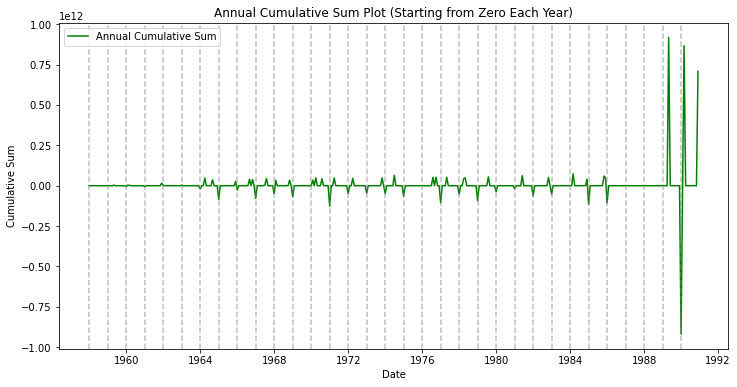

In [176]:
# 2. 计算并画出每年从头开始的年度累计折线图
df['year'] = df.index.year
df['annual_cumsum'] = df.groupby('year')['数据3.0'].cumsum() - df.groupby('year')['数据3.0'].cumsum().shift(fill_value=0)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['annual_cumsum'], linestyle='-', label='Annual Cumulative Sum', color='g')
plt.title('Annual Cumulative Sum Plot (Starting from Zero Each Year)')
plt.xlabel('Date')
plt.ylabel('Cumulative Sum')
plt.legend()

# 添加横轴标签（仅显示每年的第一天）
for year in df.index.year.unique():
    first_day_of_year = df[df.index.year == year].index[0]
    plt.axvline(x=first_day_of_year, color='gray', linestyle='--', alpha=0.5, label=f'Year {year}')

plt.grid(False)  # 禁用网格线

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)


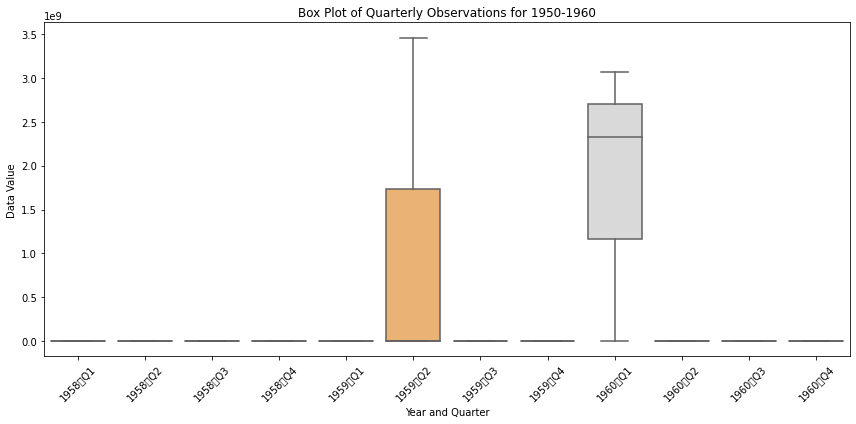

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)


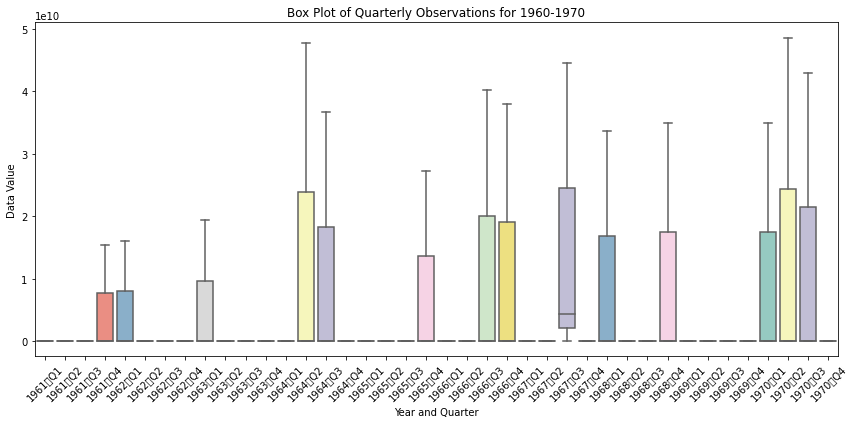

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)


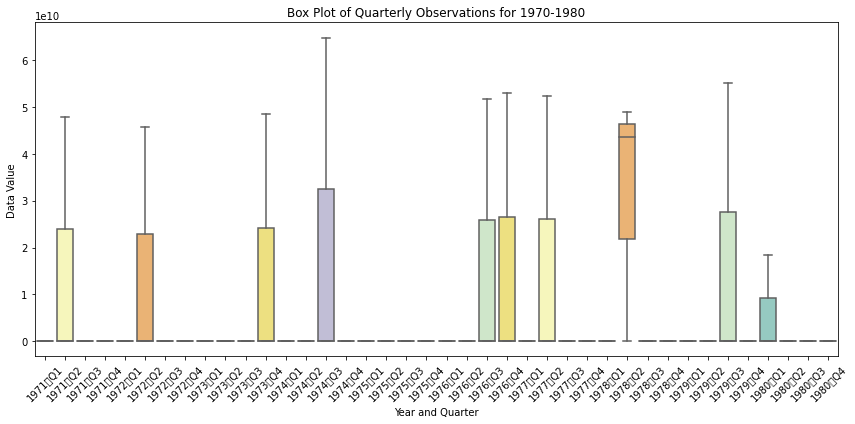

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)


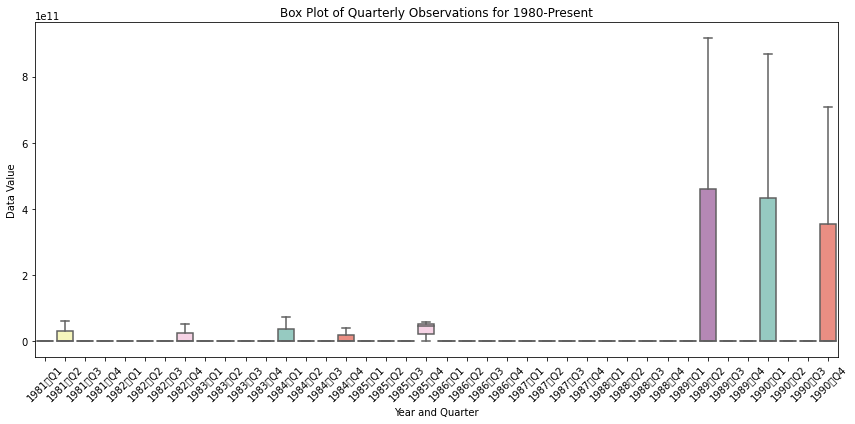

In [178]:
df['quarter'] = df.index.quarter

# 创建新列，组合年份和季度
df['year_quarter'] = df['year'].astype(str) + '年Q' + df['quarter'].astype(str)

# 获取不同的10年时间段
year_ranges = pd.date_range(start='1950-01-01', end='1990-12-01', freq='10Y')

# 分割数据并绘制每10年的箱线图
for i in range(len(year_ranges) - 1):
    start_date = year_ranges[i]
    end_date = year_ranges[i + 1]
    subset = df[(df.index >= start_date) & (df.index < end_date)]

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='year_quarter', y='数据3.0', data=subset, palette='Set3')
    plt.title(f'Box Plot of Quarterly Observations for {start_date.year}-{end_date.year}')
    plt.xlabel('Year and Quarter')
    plt.ylabel('Data Value')
    plt.xticks(rotation=45)  # 旋转x轴标签以防止重叠
    plt.grid(False)  # 禁用网格线

    # 显示图形
    plt.tight_layout()
    plt.show()

# 处理不完整的最后一个时间段并绘制箱线图
last_start_date = year_ranges[-1]
last_subset = df[df.index >= last_start_date]

if not last_subset.empty:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='year_quarter', y='数据3.0', data=last_subset, palette='Set3')
    plt.title(f'Box Plot of Quarterly Observations for {last_start_date.year}-Present')
    plt.xlabel('Year and Quarter')
    plt.ylabel('Data Value')
    plt.xticks(rotation=45)  # 旋转x轴标签以防止重叠
    plt.grid(False)  # 禁用网格线

    # 显示图形
    plt.tight_layout()
    plt.show()

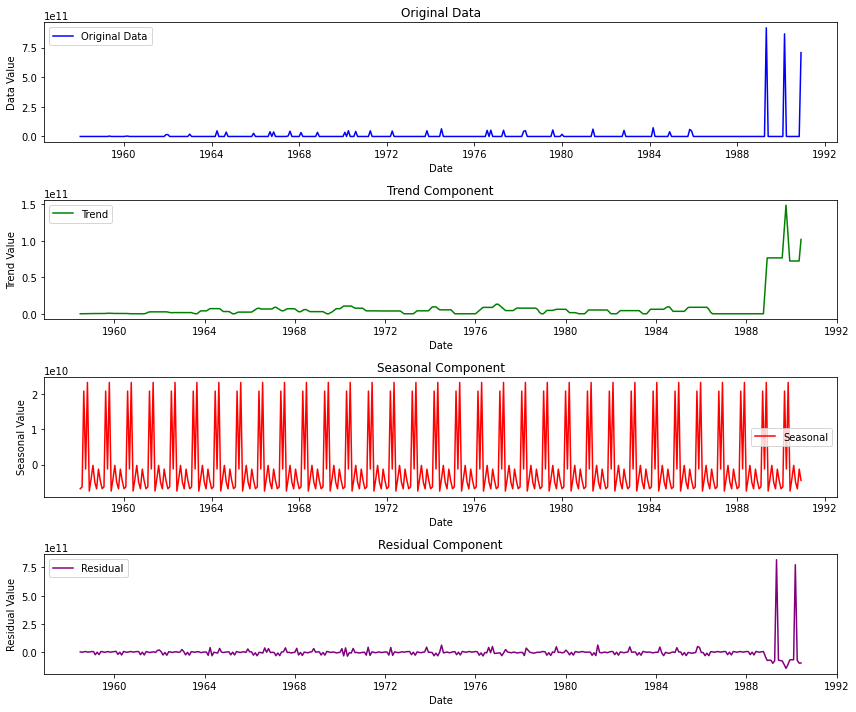

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 进行季节分解
result = seasonal_decompose(df['数据3.0'], model='additive')

# 绘制分解后的系列
plt.figure(figsize=(12, 10))

# 原始数据
plt.subplot(4, 1, 1)
plt.plot(df.index, df['数据3.0'], label='Original Data', color='b')
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.grid(False)
plt.legend()

# 趋势分量
plt.subplot(4, 1, 2)
plt.plot(df.index, result.trend, label='Trend', color='g')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend Value')
plt.grid(False)
plt.legend()

# 季节效应
plt.subplot(4, 1, 3)
plt.plot(df.index, result.seasonal, label='Seasonal', color='r')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Value')
plt.grid(False)
plt.legend()

# 残差
plt.subplot(4, 1, 4)
plt.plot(df.index, result.resid, label='Residual', color='purple')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()